# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GRUPA 4 PONIEDZIAŁEK 16:20"
COLLABORATORS = "Zuzanna Kiełbasa 408129, Kamila Jałocha 408053, Maja Kruszona 408661, Bartosz Baran 407073, Damian Siemieniec 405256"

---

## Zestaw zadań 7: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 1)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów


In [3]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    area = (max(x_lim)-min(x_lim))*(max(y_lim)-min(y_lim))
    print(area)
    n = sp.stats.poisson.rvs(intensity*area, size=1)
    print(n)
    x=sp.stats.uniform.rvs(size = n[0])
    y=sp.stats.uniform.rvs(size = n[0])
    xs = x*(x_lim[1]-x_lim[0])+x_lim[0]
    ys = y*(y_lim[1]-y_lim[0])+y_lim[0]
    
    df=pd.DataFrame()
    df['X']=xs
    df['Y']=ys
    return df
#raise NotImplementedError()

### Zadanie 1: Import i przygotowanie danych (9 pkt)

Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z trzech dołączonych do niego plików. Następnie, wykorzystując funkcję `geopandas.GeoDataFrame()` przygotuj na ich podstawie trzy tablice z danymi:

1) Tablica zawierająca wybrane dane dotyczące województw:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierającąa wybrane dane dotyczące <u>miast</u>:
    - "Nazwa" - nazwy miast
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierająca wybrane dane dotyczące <u>Wisły</u> i <u>Odry</u>:
    - "Nazwa" - nazwy rzek
    - "geometry" - geometria obiektów


Wyświetl przygotowane tablice.

Uwaga 1: Pliki zawierają więcej danych niż opisane wyżej tablice. W wynikowych tablicach nie powinny znaleźć się zbędne dane.
    
Uwaga 2: Poprawny import polskich nazw może wymagać ustawienia odpowiedniej wartości argumentu `encoding` podczas wywoływania funkcji `geopandas.read_file()`.

In [4]:
# Województwa
wojewodztwa = gpd.read_file("Wojewodztwa.zip", encoding='utf-8')  
wojewodztwa
ww = {'Nazwa': wojewodztwa['JPT_NAZWA_'], 'geometry': wojewodztwa['geometry']}
w = gpd.GeoDataFrame(ww)
print(w)
#raise NotImplementedError()

                  Nazwa                                           geometry
0               śląskie  MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...
1              opolskie  POLYGON ((17.81203 51.18669, 17.81209 51.18670...
2        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...
3             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...
6          dolnośląskie  POLYGON ((15.10534 51.42730, 15.10540 51.42732...
7         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...
8          podkarpackie  POLYGON ((22.03538 50.80675, 22.03550 50.80681...
9           małopolskie  POLYGON ((19.97230 50.51625, 19.97227 50.51633...
10  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...
11              łódzkie  POLYGON ((19.99385 51.18395, 19.99410 51.18395...
12          mazowieckie  

In [5]:
# Miasta
# YOUR CODE HERE
miasta = gpd.read_file("Miejscowosci.zip", encoding = "UTF-8")
#miasta
miasta = miasta[miasta['rodzaj']== 'miasto']
#miasta

 

mm = {'Nazwa': miasta['nazwaGlown'], 'geometry': miasta['geometry']}
m = gpd.GeoDataFrame(mm)
print(m)
#raise NotImplementedError()

                       Nazwa                       geometry
325     Aleksandrów Kujawski  POINT (479373.050 556833.540)
326       Aleksandrów Łódzki  POINT (520933.510 439274.230)
390                 Alwernia  POINT (538609.780 243752.610)
447                Andrychów  POINT (524250.260 220924.610)
580                  Annopol  POINT (700882.160 339274.920)
...                      ...                            ...
101357               Żuromin  POINT (561072.600 578091.430)
101387               Żychlin  POINT (542758.370 486616.290)
101460              Żyrardów  POINT (599274.600 466617.820)
101497                Żywiec  POINT (513848.050 201968.410)
101931                  Brok  POINT (693022.080 540797.530)

[964 rows x 2 columns]


In [6]:
# Rzeki
# YOUR CODE HERE
rzek = gpd.read_file("Rzeki.zip", encoding = "1250")

 

rzek1 = rzek[rzek['NAZ_RZEKI']== 'Odra']
rzek2 = rzek[rzek['NAZ_RZEKI']== 'Wisła'] 

 

rzek = pd.concat([rzek1, rzek2])
rzek

 

r = {'Nazwa': rzek['NAZ_RZEKI'], 'geometry': rzek['geometry']}
rz = gpd.GeoDataFrame(r)
print(rz)
#raise NotImplementedError()

   Nazwa                                           geometry
0   Odra  MULTILINESTRING ((17.52056 49.61373, 17.52159 ...
1  Wisła  MULTILINESTRING ((19.00368 49.60595, 19.00338 ...


### Zadanie 2: Transformacja między odwzorowaniami kartograficznymi (3 pkt)

Wczytywane dane są zapisane z wykorzystaniem różnych odwzorowań kartograficznych. Przed rozpoczęciem analizy należy je ze sobą uzgodnić.

Korzystając z własności obiektów GeoDataFrame `geopandas.GeoDataFrame.crs` sprawdzć odwzorowanie kartograficzne, w którym zapisane są poszczególne tablice. Jeżeli odwzorowanie jest inne niż epsg:2180 dokonaj jego konwersji z wykorzystaniem funkcji `geopandas.GeoDataFrame.to_crs()`.

In [9]:
rz=rz.to_crs(2180)

w=w.to_crs(2180)

m=m.to_crs(2180)
w.crs
#raise NotImplementedError()

<Derived Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Zadanie 3: Wizualizacja danych wejściowych (3 pkt)

Korzystając z funkcji pakietu matplotlib oraz funkcji `geopandas.GeoDataFrame.plot()` zwizualizuj komplet przygotowanych danych. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

Text(0.5, 1.0, 'Rzeczpospolita Polska')

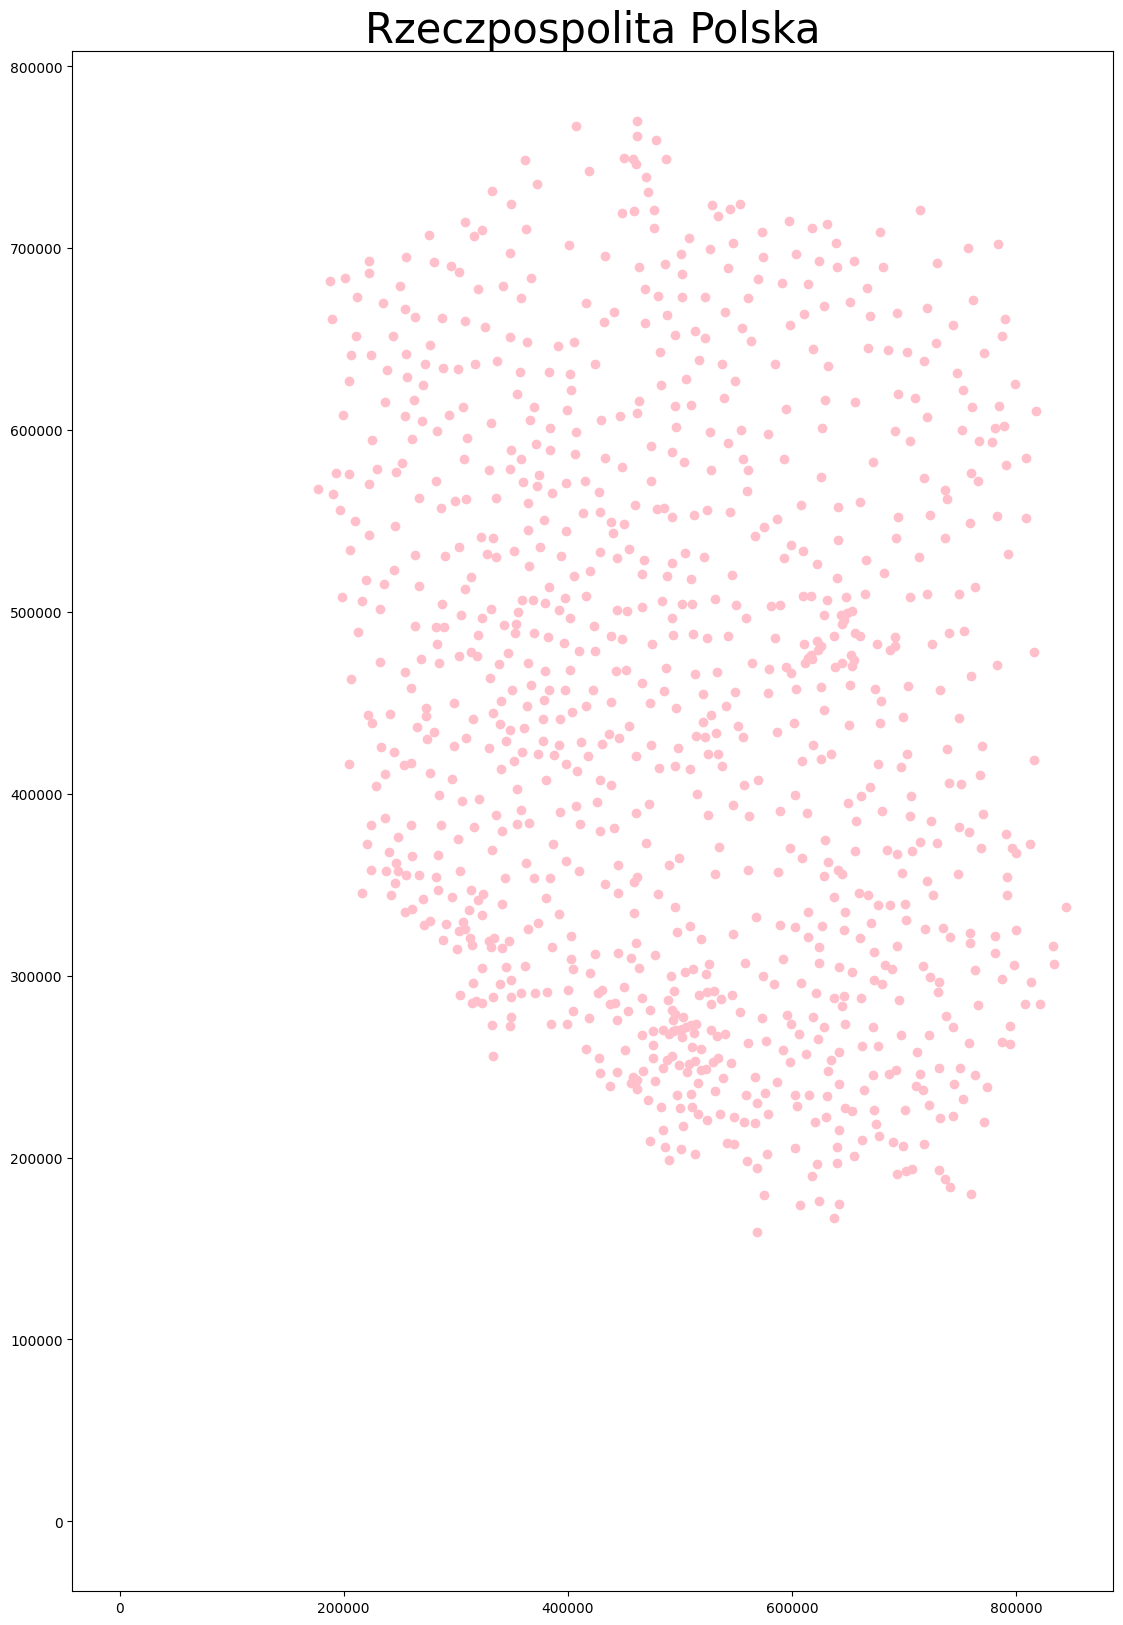

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
fig,ax=plt.subplots(1,1,figsize=(20,20))
w.plot(ax=ax,color='grey')
m.plot(ax=ax,color='pink')
rz.plot(ax=ax,color='blue')
ax.set_title('Rzeczpospolita Polska',size=30)

### Zadanie 4: Mierzenie długości, pola powierzchni i odległości (10 pkt)

#### a) Długość Wisły
Korzystając z własności `geopandas.GeoSeries.length` zmierz długość Wisły. Wyświetl odpowiedź podając długość rzeki w kilometrach.

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
#wisla=rz[1]
rzekii=rz.length
dl_wisla=rzekii[1]
dlugosc=dl_wisla/1000
dlugosc


C:\Users\sanic\AppData\Local\Temp\ipykernel_21988\3537126288.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rzekii=rz.length


0.012072679362200966

#### b) Pola powierzchni województw
Korzystając z własności `geopandas.GeoSeries.area` zmierz powierzchnię województw. Zapisz wyniki do tablicy w kolumnie o nazwie "Pole". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie jakie jest pole powierzchni Polski (podaj pole w kilometrach kwadratowych) oraz przygotowania wizualiacji, na której kolor przypisany województwom jest powiązany z ich powierzchnią. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [9]:
# Obliczenia
# YOUR CODE HERE
pow=w.area/1000000
pow_Polski=sum(pow)
w['Pole']=pow
print(pow_Polski)
print(w)


C:\Users\sanic\AppData\Local\Temp\ipykernel_21988\3243339311.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pow=w.area/1000000


4.105171134782644e-05
                  Nazwa                                           geometry  \
0               śląskie  MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...   
1              opolskie  POLYGON ((17.81203 51.18669, 17.81209 51.18670...   
2        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...   
3             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...   
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...   
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...   
6          dolnośląskie  POLYGON ((15.10534 51.42730, 15.10540 51.42732...   
7         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...   
8          podkarpackie  POLYGON ((22.03538 50.80675, 22.03550 50.80681...   
9           małopolskie  POLYGON ((19.97230 50.51625, 19.97227 50.51633...   
10  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...   
11              łódzkie  POLYGON ((19.9938

<AxesSubplot: title={'center': 'Powierzchnia Polski'}>

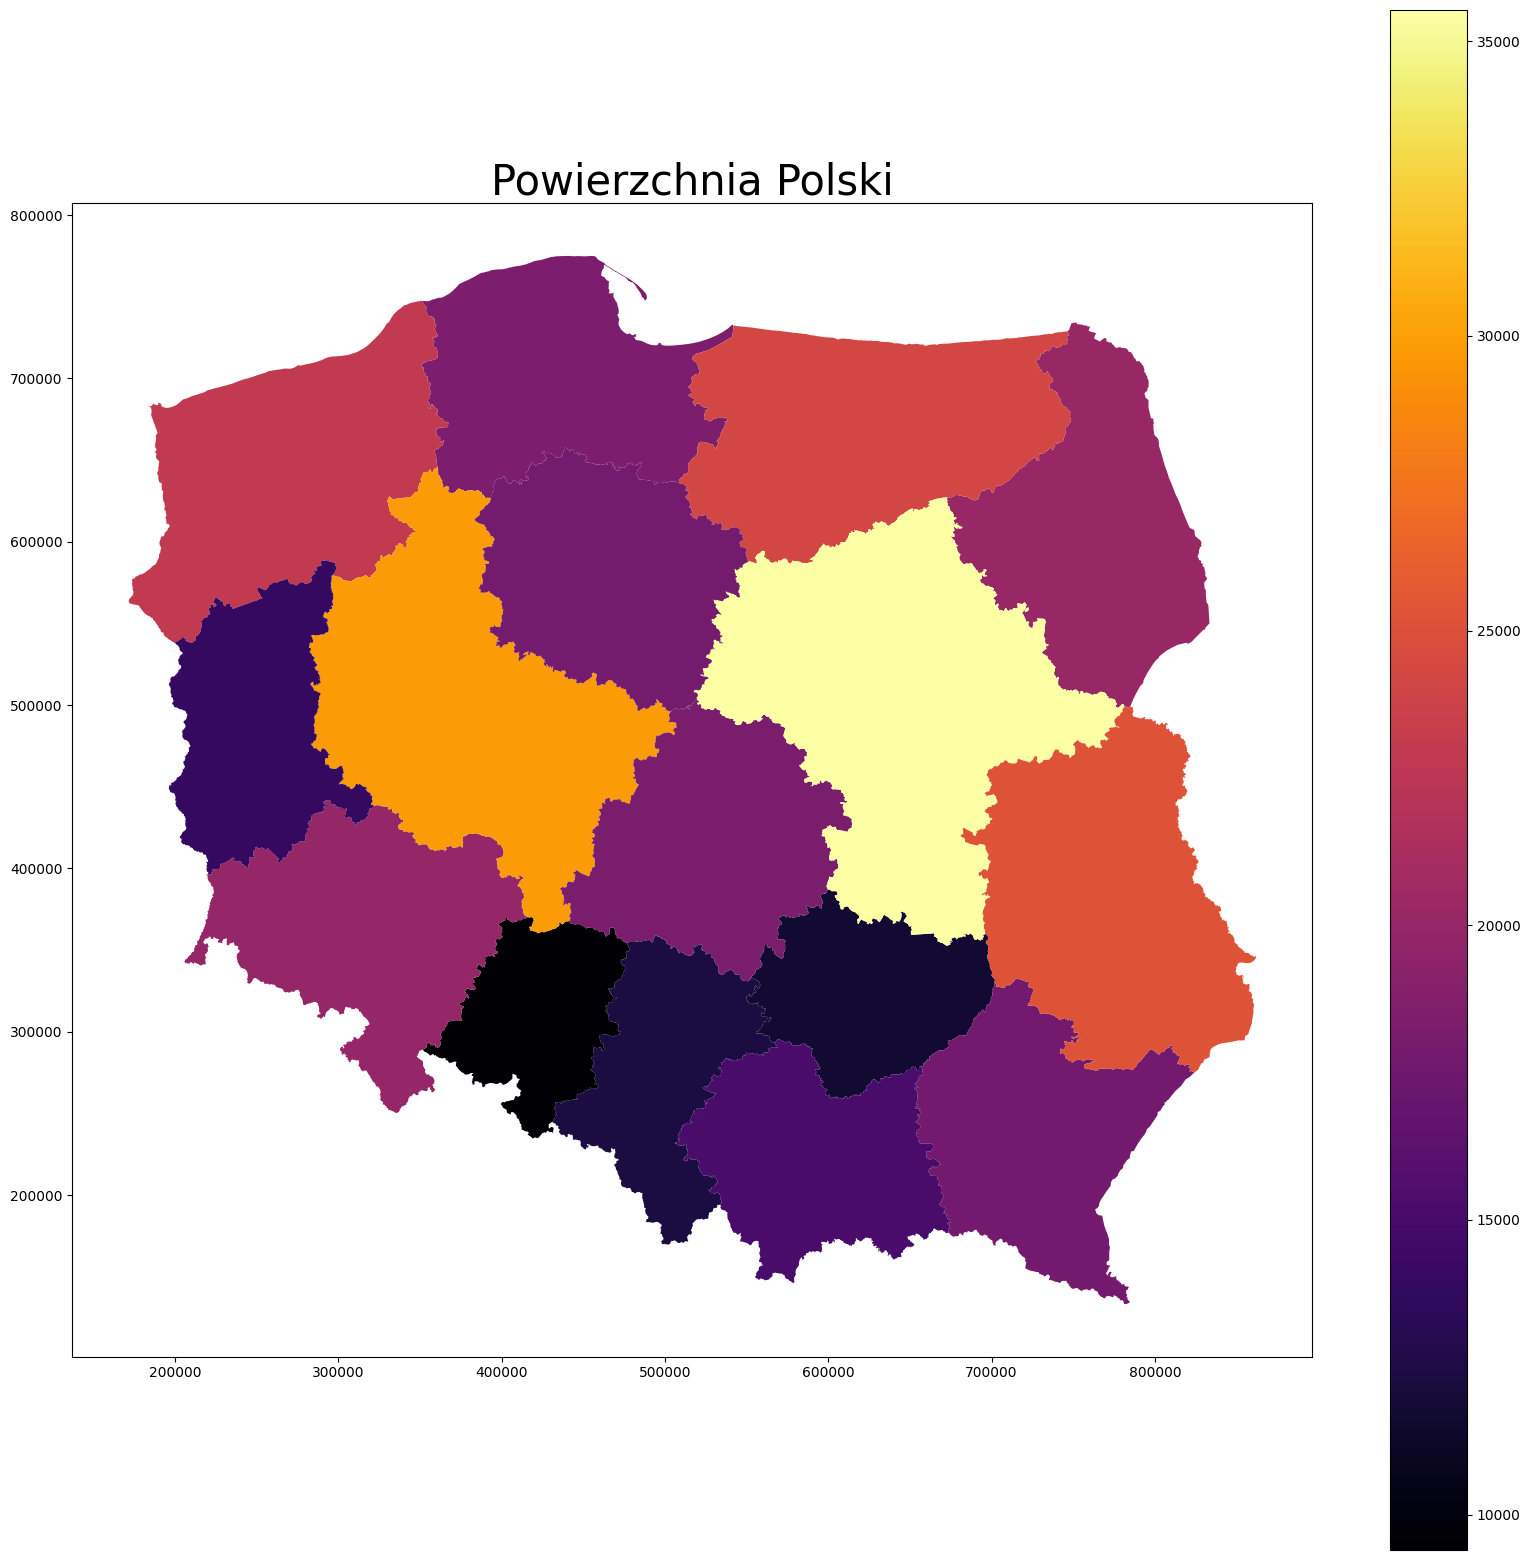

In [13]:
# Wizualizacja
# YOUR CODE HERE
fig,ax=plt.subplots(1,1,figsize=(20,20))
ax.set_title('Powierzchnia Polski',size=30)
w.plot(column='Pole', ax=ax, legend=True, cmap='inferno')

#### c) Odległość miast od Krakowa
Korzystając z funkcji `geopandas.GeoSeries.distance()` zmierz odległość poszczególnych miast od Krakowa. Zapisz wyniki do tablicy w kolumnie o nazwie "Odległość od Krakowa". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie w jakiej odległości od Krakowa leży Poznań (odpowiedź podaj w kilometrach) oraz przygotowania wizualiacji, na której kolor przypisany miastom jest powiązany z ich odległością od Krakowa. 

Wizualizacja powinna zawierać:
- kontury województw, bez wypełnienia,
- lokalicaje miast.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [10]:
# Obliczenia
# YOUR CODE HERE
#m
Krakow=m[m['Nazwa']== 'Kraków']

Poznan=m[m['Nazwa']== 'Poznań']


m['Odległość od Krakowa']=m.distance(Krakow['geometry'][37334])
m
Poznan
print("Odległość Poznania do Krakowa")
Poznan['Odległość od Krakowa'][66964]/1000
#raise NotImplementedError()

Odległość Poznania do Krakowa


KeyError: 'Odległość od Krakowa'

In [ ]:
# Wizualizacja
# YOUR CODE HERE
fig,ax=plt.subplots(1,1,figsize=(20,20))
ax.set_title('Odległość od Krakowa',size=30)
w.plot(ax=ax,)
m.plot(column='Odległość od Krakowa', ax=ax, legend=True, cmap='inferno')

### Zadanie 5: Wykorzystanie prostych operacji geometrycznych (12 pkt)

#### a) Miasta blisko Wisły

Korzystając z funkcji `geopandas.GeoSeries.buffer()` oraz `geopandas.GeoSeries.within()` sprawdź, które miast leżą bliżej niż 20 km od Wisły. Zapisz wyniki do tablicy w kolumnie o nazwie "Blisko Wisły". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie ile miast leży bliżej niż 20 km od Wisły oraz przygotowania wizualiacji, na której oznaczony zostanie obszar znajdujący się bliżej niż 20 km od Wisły, a znajdujące się w tym obszarze miasta będą wyróżnione kolorem względem pozostałych miast.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednolitym kolorem,
- miasta, w jednym z dwóch wybranych kolorów w zależności od położenia w obrębie lub poza analizowanym obszarem.
- rzeki wypełnione jednolitym kolorem,
- oznaczenie obszaru leżącego nie dalej niż 20 km od Wisły.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [1]:
# Obliczenia
# YOUR CODE HERE
wisla = rz[rz['Nazwa']== 'Wisła'] 
#print(wisla)
wbufor = wisla.buffer(20000) #20000 zeby bylo 20km


#m.within(wbufor[1]) samo sprawdzenie czy sie znajduja
#print(wbufor)

m['Blisko Wisły'] = m.within(wbufor[1])   #dodanie kolumny i sprawdzenie 

#print(m)

print(np.sum(m['Blisko Wisły']))

#raise NotImplementedError()


NameError: name 'rz' is not defined

Text(0.5, 1.0, 'Rzeczpospolita Polska')

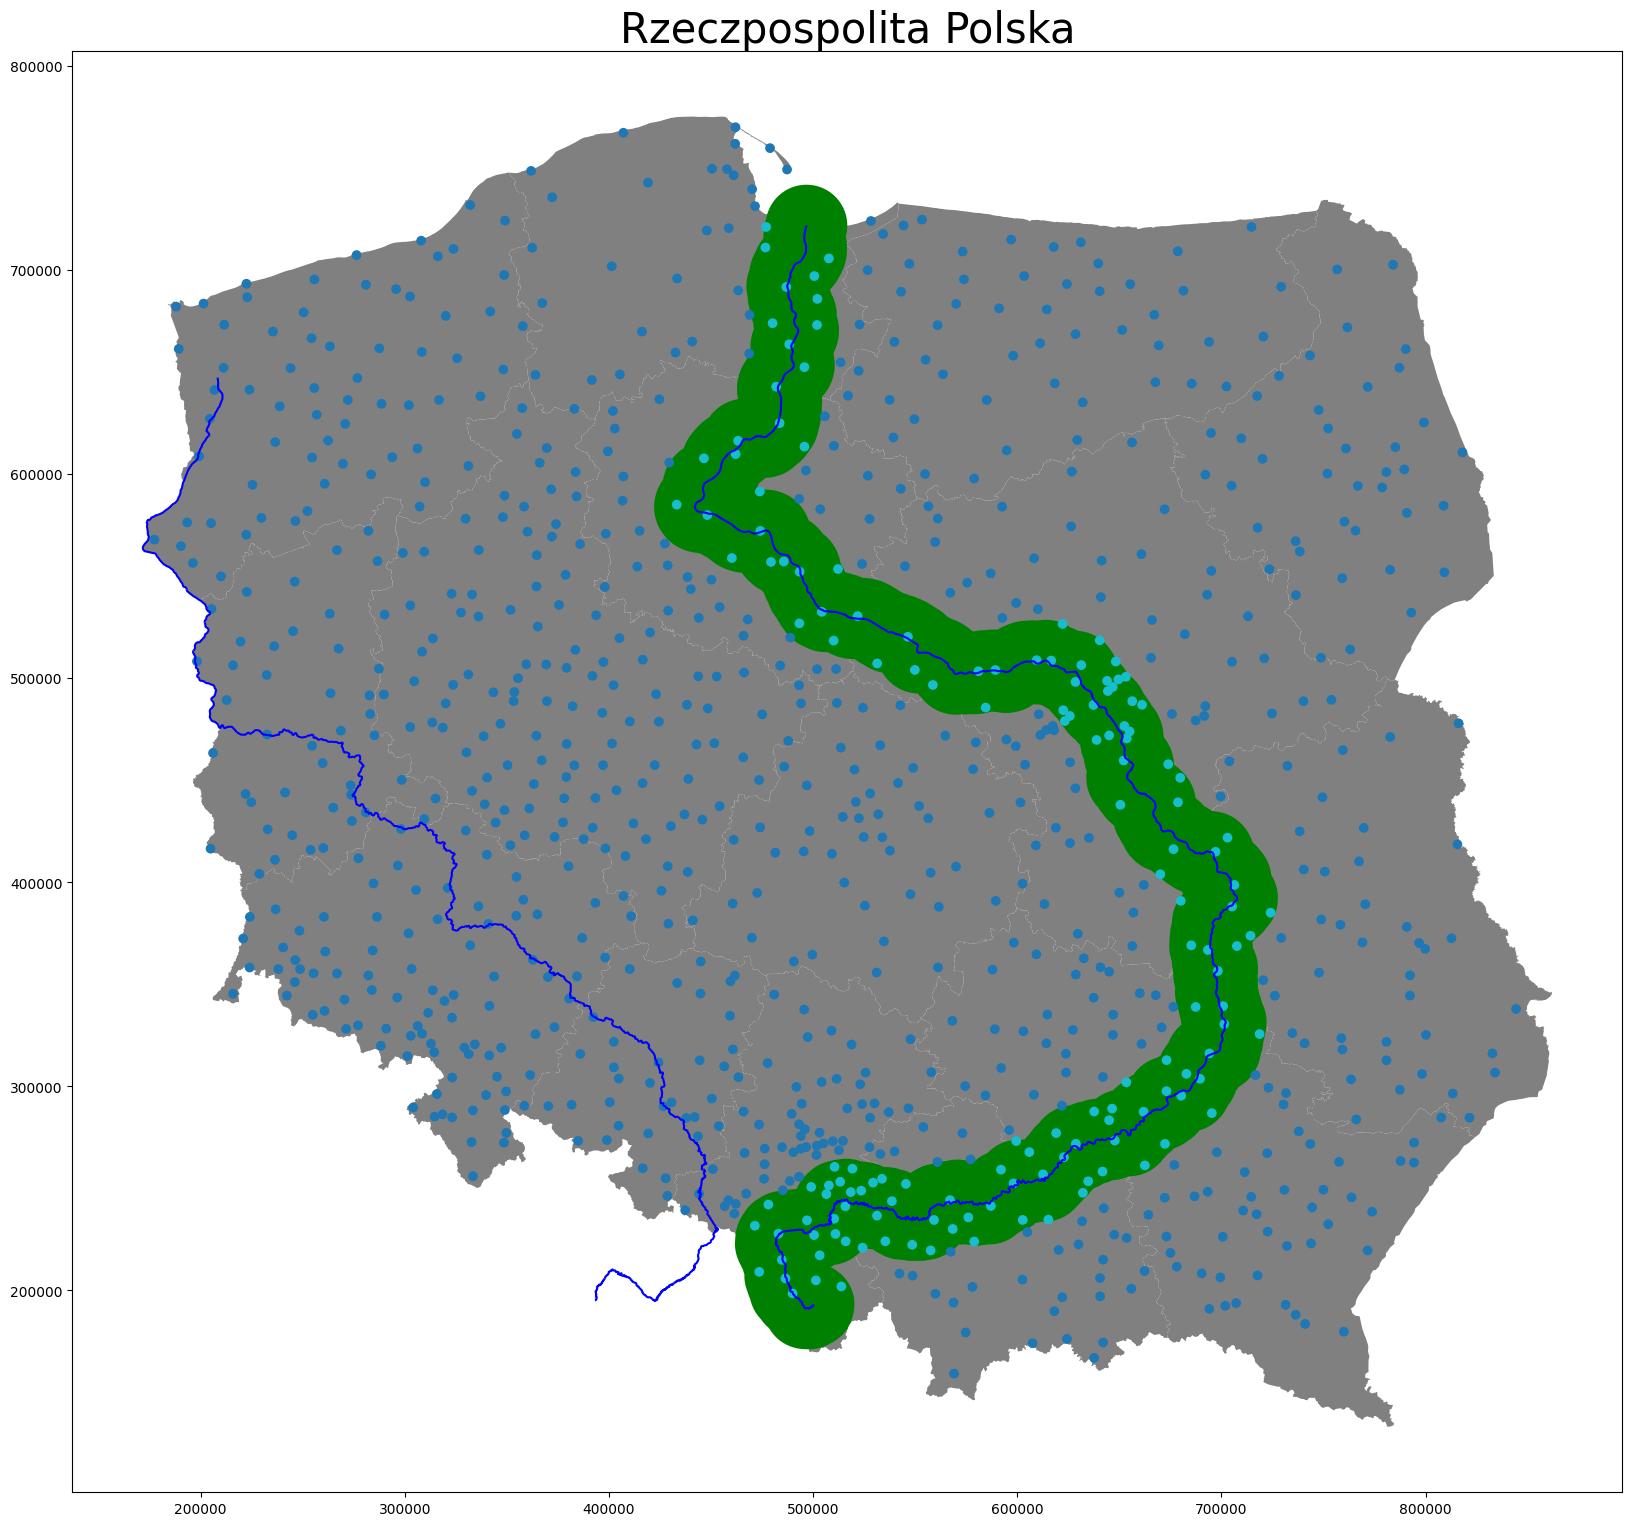

In [17]:
# Wizualizacja
# YOUR CODE HERE
fig,ax=plt.subplots(1,1,figsize=(20,20))
w.plot(ax=ax,color='grey')
wbufor.plot(ax=ax,color='green')
rz.plot(ax=ax,color='blue')
m.plot(ax=ax, column='Blisko Wisły')

ax.set_title('Rzeczpospolita Polska',size=30)
#raise NotImplementedError()


#### b) Województwa, przez które przepływa Odra
Korzystając z funkcji `geopandas.GeoSeries.intersects()` sprawdź, przez które województwa przepływa Odra. Zapisz wyniki do tablicy w kolumnie o nazwie "Odra w obrębie". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie przez ile województw przepływa Odra oraz przygotowania wizualiacji, na której województwa przez które przepływa Odra będą wyróżnione kolorem względem pozostałych województw.

Wizualizacja powinna zawierać:
- województwa, wwypełnione jednym z dwóch wybranych kolorów w zależności od spełnienia warunku,
- miasta, wypełnione jednolitym kolorem,
- rzeki wypełnione jednolitym kolorem.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [19]:
# Obliczenia
# YOUR CODE HERE
odra = rz[rz['Nazwa']== 'Odra'] 
#print(odra)
w['Odra w obrębie'] = w.intersects(odra['geometry'][0])   #dodanie kolumny i sprawdzenie 
#print(w)
print(np.sum(w['Odra w obrębie']))
#raise NotImplementedError()


5


Text(0.5, 1.0, 'Rzeczpospolita Polska')

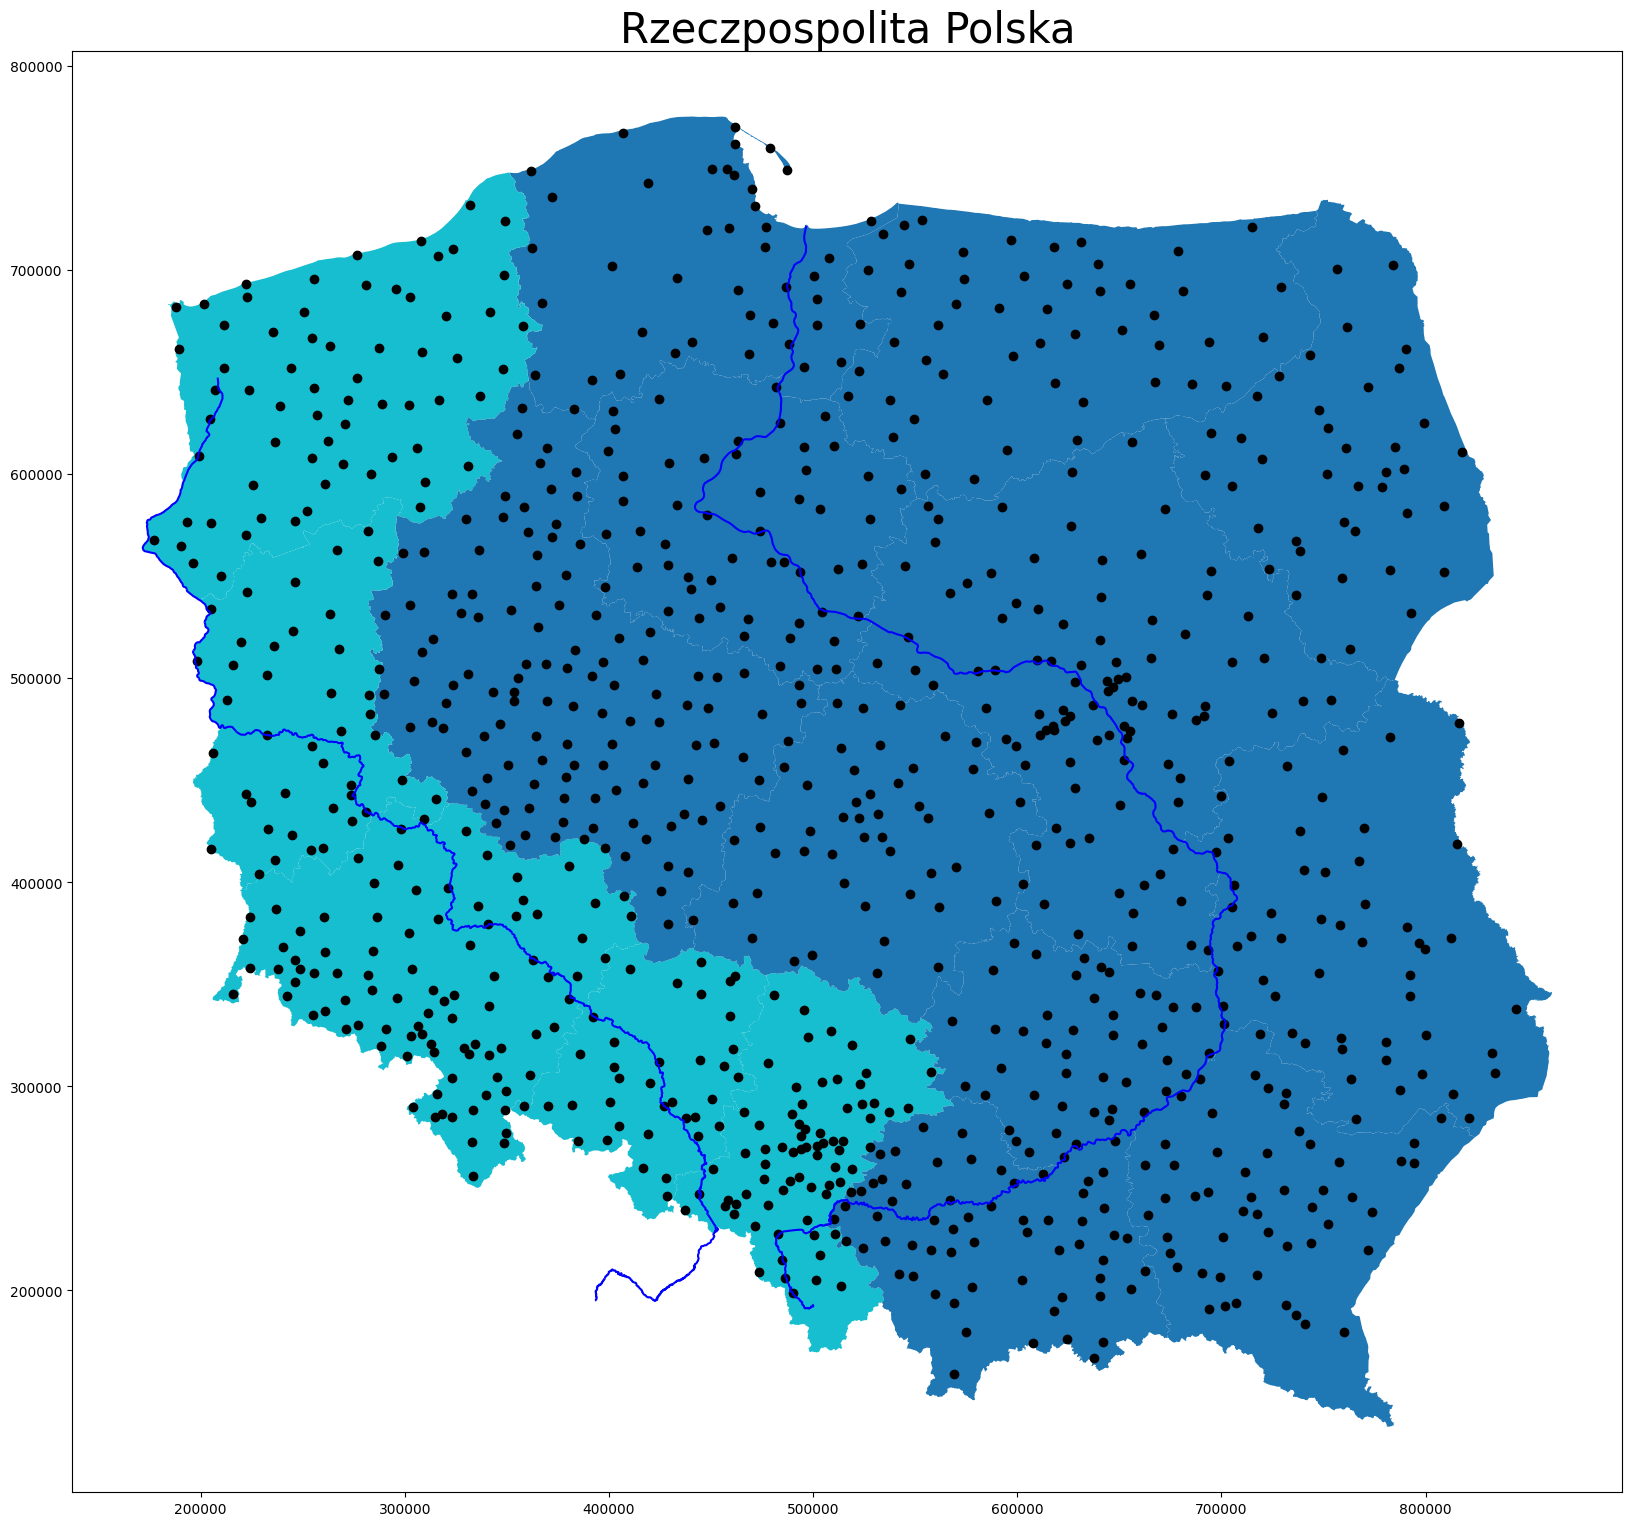

In [20]:
# Wizualizacja
# YOUR CODE HERE
fig,ax=plt.subplots(1,1,figsize=(20,20))
w.plot(ax=ax,column='Odra w obrębie')
rz.plot(ax=ax,color='blue')
m.plot(ax=ax, color='black')

ax.set_title('Rzeczpospolita Polska',size=30)
#raise NotImplementedError()


### Zadanie 6: Generowanie procesu punktowego w obrębie poligonu (13 pkt)

Przygotuj funkcję `homogeneous_poisson_on_polygon()`, która będzie wykorzystywała funkcję `homogeneous_poisson_on_rectangle()` przygotową w ramach pierwszego zestawu zadań oraz możliwości pakietu geopandas do generowania jednorodnego rozkładu Poissona w obrębie dowolnego poligonu.

Następnie wykorzystaj funkcję do wygenerowania rozkładu punktów o intensywności $10^{-8} pkt/m^2$ na obszarze województwa mazowieckiego i zwizualizuj wyniki. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

Przydatne funkcje i własności:
- `geopandas.GeoSeries.bounds`
- `geopandas.GeoSeries.from_xy()`
- `geopandas.GeoSeries.set_crs()`
- `geopandas.GeoSeries.within()`

#### a) Przygotowanie funkcji

In [19]:
def homogeneous_poisson_on_polygon(intensity, polygon):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty.
    
    Returns
    -------
    points: GeoDataFrame
        Tablica zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    limits=polygon.bounds
    hp=homogeneous_poisson_on_rectangle(intensity,[limits[0],limits[2]],[limits[1],limits[3]])
    ds = gpd.GeoDataFrame(hp, geometry=gpd.points_from_xy(hp.X, hp.Y))

    poisson=gpd.clip(ds,polygon)
    poisson.set_crs(2180)

    return poisson

#### b) Wygenerowanie procesu

In [20]:
# YOUR CODE HERE
maz=w['geometry'][12]
inte=10**-8
print(maz)
poi_maz=homogeneous_poisson_on_polygon(inte, maz)
maz.bounds

#raise NotImplementedError()

POLYGON ((700396.1554630738 572145.5610516965, 700403.9682490663 572130.4559137393, 700407.6586172383 572123.2973055011, 700420.6594411735 572104.3558866289, 700427.9588571053 572097.2579574119, 700432.2220745066 572089.285244613, 700442.538803972 572063.6576523026, 700447.8978002671 572057.635837948, 700456.2775841702 572054.1188264219, 700470.839228969 572054.5248499755, 700479.435999884 572049.6836109208, 700483.4602473238 572038.4434968447, 700488.4849258445 572030.7820598017, 700517.9852360648 572004.0891296994, 700536.1862718022 571981.9521569023, 700547.6449926445 571962.357565959, 700563.5703865251 571944.3479312053, 700577.5866339487 571916.613037888, 700580.6572631852 571912.6679324573, 700594.3273079261 571904.8774969848, 700592.11619193 571903.4655028302, 700568.2989199718 571856.211677976, 700575.3006859702 571849.3854985787, 700577.0487855339 571847.673929872, 700578.7038138056 571846.0697308592, 700592.0396062424 571833.0489357598, 700604.0796408111 571821.3021248486, 70

(517613.878019597, 352474.63650221284, 781450.3618609649, 627243.1640418535)

#### c) Wizualizacja

Text(0.5, 1.0, 'Rozkład Poissona na tle Województwa Mazowieckiego')

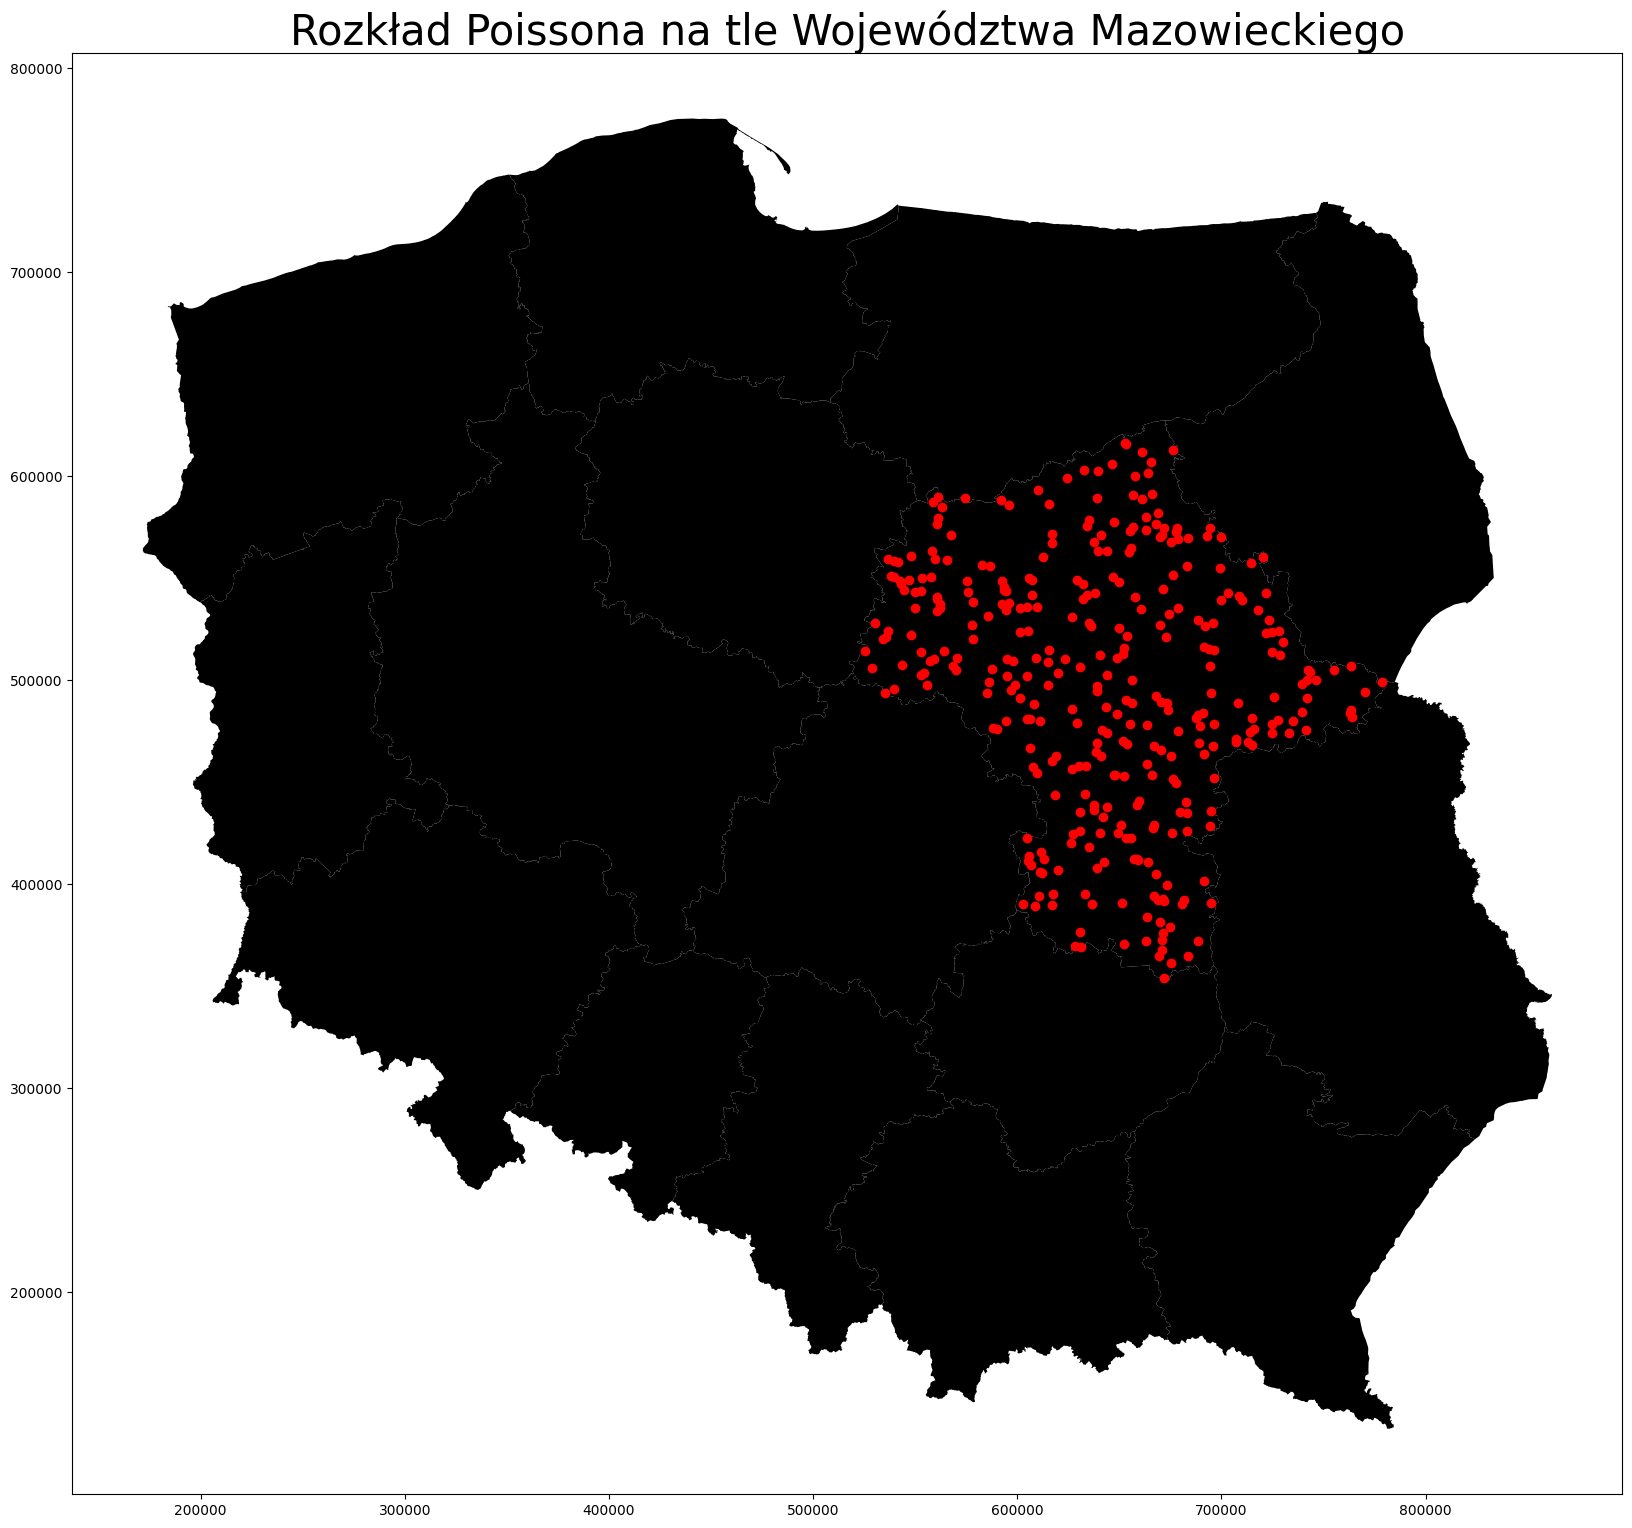

In [21]:
# YOUR CODE HERE
fig,ax=plt.subplots(1,1,figsize=(20,20))
w.plot(ax=ax,color='black')
poi_maz.plot(ax=ax,color='red')
ax.set_title('Rozkład Poissona na tle Województwa Mazowieckiego',size=30)
